<a href="https://colab.research.google.com/github/hugoalexg/Python-for-Data-Science-and-Machine-Learning-Bootcamp/blob/main/21_Neural_Nets_and_Deep_Learning_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Keras Regression Code Along Project**

The Data
We will be using data from a Kaggle data set:
https://www.kaggle.com/harlfoxem/housesalesprediction


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Python for Data Science and Machine Learning Bootcamp/Files/kc_house_data.csv")

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#calculando preço por square-fts
df['price_by_sqft'] = df['price']/df['sqft_living']

In [ ]:
#retirando do dataframe casas acima de 1.5M dolares
df = df[df['price'] <= 1500000.0]
df.sort_values('price',ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_by_sqft
21307,9402800005,10/28/2014,1500000.0,3,3.50,3530,3610,2.0,0,0,3,10,2370,1160,2008,0,98103,47.6857,-122.339,1780,3610,424.929178
7057,327000050,12/12/2014,1500000.0,4,3.25,3860,7199,2.0,0,1,3,9,2870,990,2005,0,98115,47.6855,-122.269,2940,9600,388.601036
3920,4141800215,11/26/2014,1500000.0,4,3.75,3770,4000,2.5,0,0,5,9,2890,880,1916,0,98122,47.6157,-122.287,2800,5000,397.877984
3985,629000615,10/22/2014,1500000.0,4,3.25,3070,10375,2.0,0,0,3,10,2180,890,1962,2005,98004,47.5862,-122.198,2500,11194,488.599349
14939,2344300170,8/15/2014,1500000.0,5,3.50,4370,12240,2.0,0,0,3,11,3270,1100,1990,0,98004,47.5820,-122.199,2980,12800,343.249428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,2,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570,158.653846
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250,95.348837
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,1,5,730,0,1943,0,98168,47.4808,-122.315,860,9000,110.958904
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500,186.046512


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


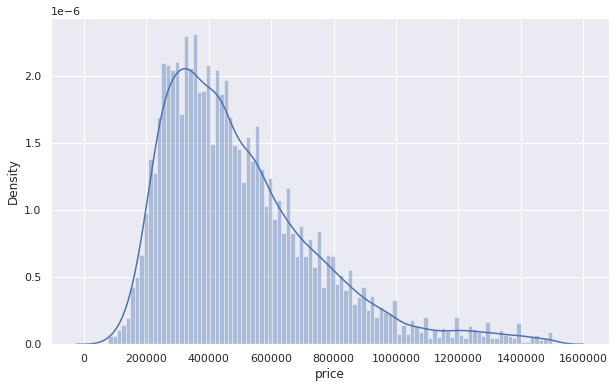

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'],bins=100)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


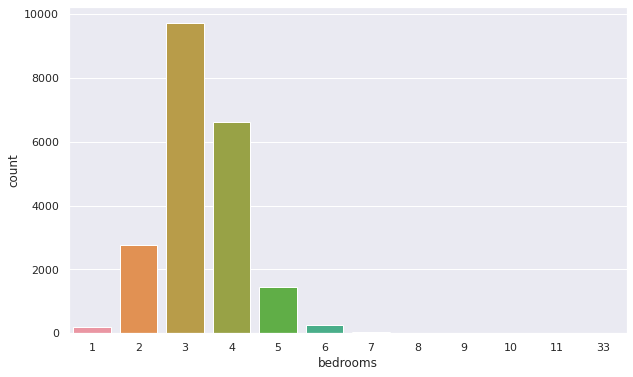

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(df['bedrooms'])
plt.show()

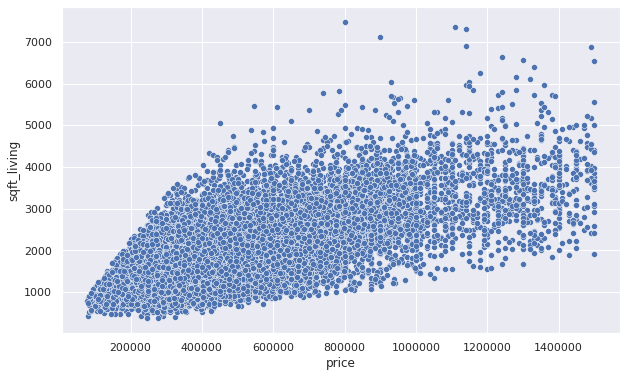

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'price', y = 'sqft_living', data = df)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

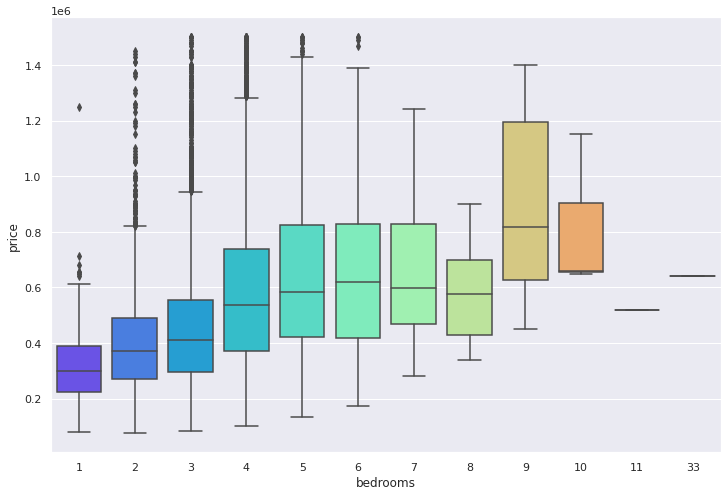

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bedrooms',y='price',data=df, palette='rainbow')
plt.show()

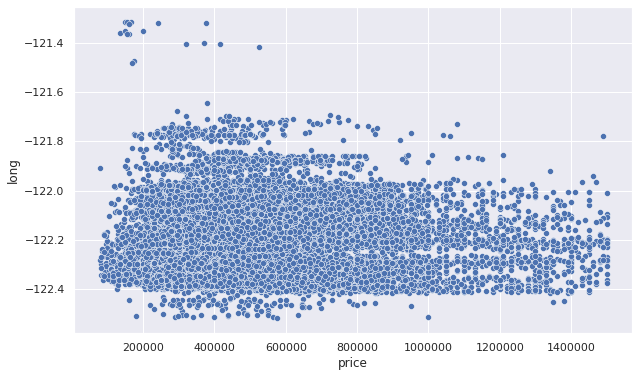

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='long',data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

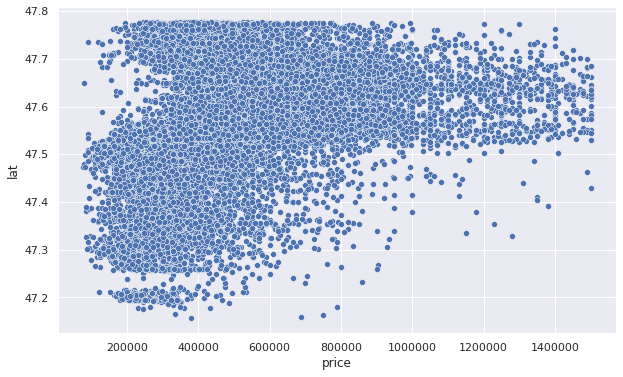

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='lat',data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [ ]:
#non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:] #tirando do dataframe as 216 casas mais caras

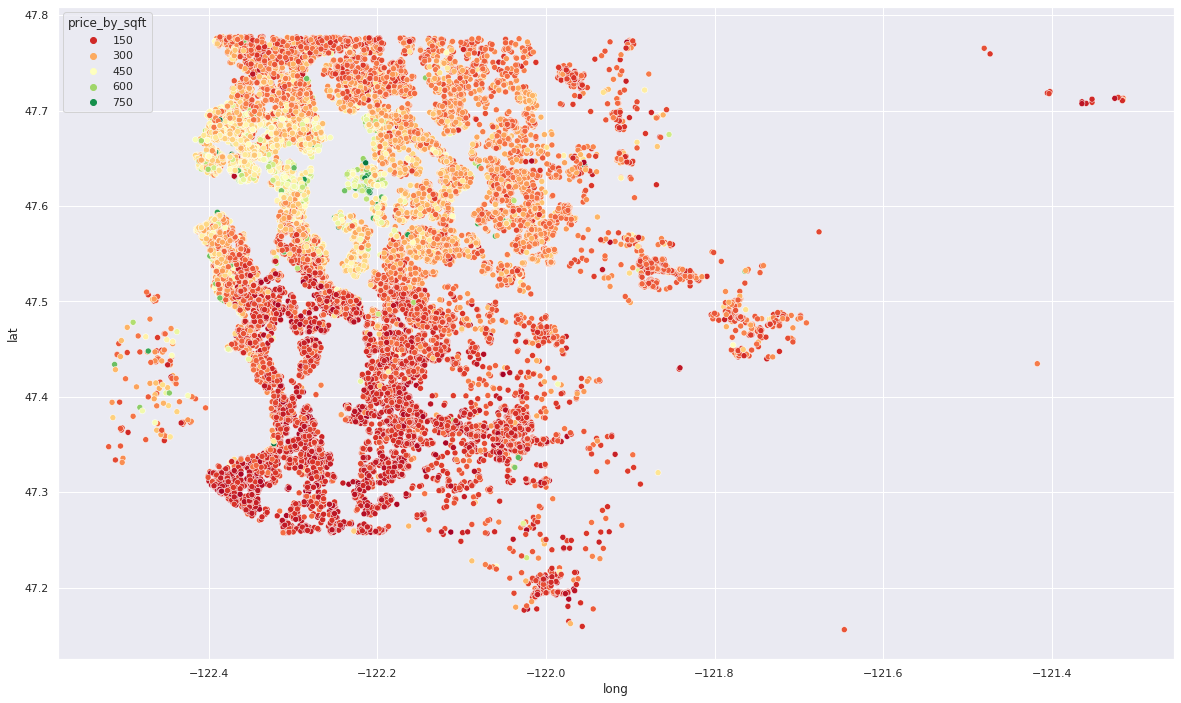

In [ ]:
#vendo a distribuiçao do preço por pés-quadrados
plt.figure(figsize=(20,12))
sns.scatterplot(x='long',y='lat',data=df, palette='RdYlGn',hue='price_by_sqft')
plt.show()

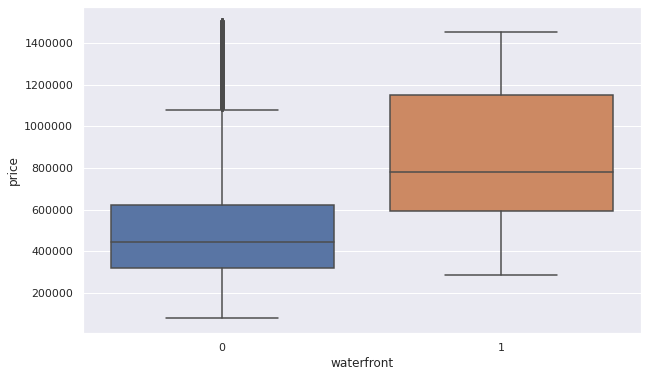

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='waterfront',y='price',data=df)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [ ]:
df = df.drop('id',axis=1)

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['year'] = df['date'].apply(lambda date:date.year)
df['month'] = df['date'].apply(lambda date:date.month)

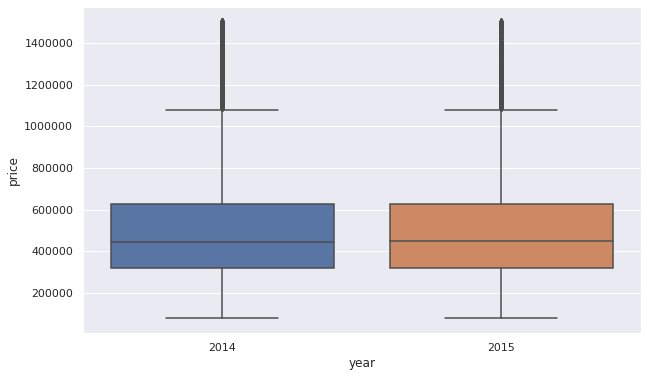

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='year',y='price',data=df)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

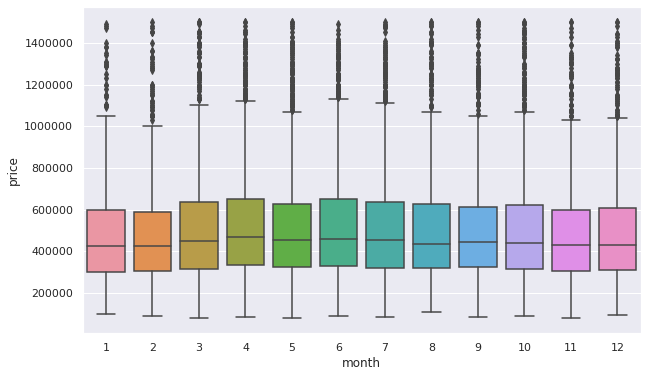

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month',y='price',data=df)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

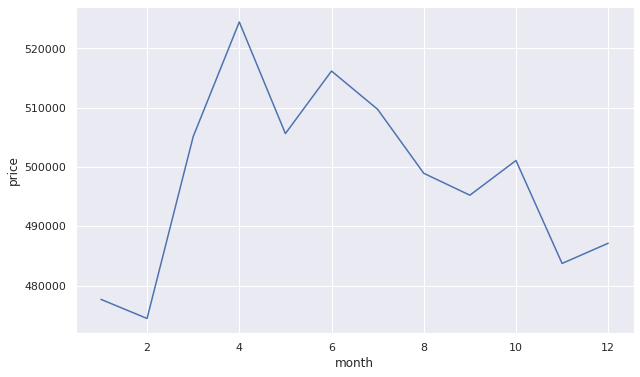

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df.groupby('month').mean(), x="month", y="price")
plt.show()

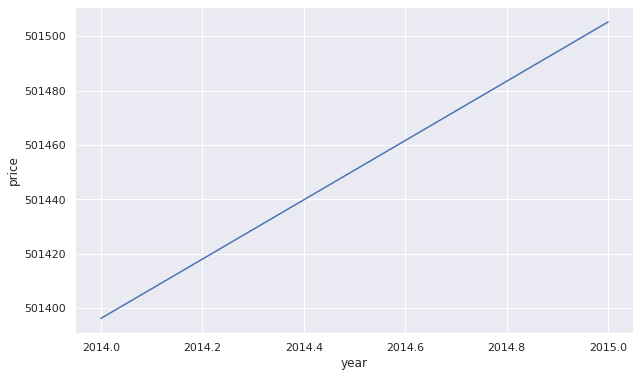

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df.groupby('year').mean(), x="year", y="price")
plt.show()

In [ ]:
df = df.drop('date',axis=1)
df = df.drop('zipcode',axis=1)
df = df.drop('price_by_sqft',axis=1)

**Scaling and Train Test Split**

In [ ]:
X = df.drop('price',axis=1)
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

**Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Creating a Model**


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
116/116 [==============================] - 1s 3ms/step - loss: 316213881654.7009 - val_loss: 310266920960.0000
Epoch 2/400
116/116 [==============================] - 0s 4ms/step - loss: 316669370297.9829 - val_loss: 307673300992.0000
Epoch 3/400
116/116 [==============================] - 0s 2ms/step - loss: 316640270073.4359 - val_loss: 283995996160.0000
Epoch 4/400
116/116 [==============================] - 0s 2ms/step - loss: 267165222264.3419 - val_loss: 198557319168.0000
Epoch 5/400
116/116 [==============================] - 0s 2ms/step - loss: 169195790966.1538 - val_loss: 76150898688.0000
Epoch 6/400
116/116 [==============================] - 0s 2ms/step - loss: 61516831087.5897 - val_loss: 40156590080.0000
Epoch 7/400
116/116 [==============================] - 0s 2ms/step - loss: 40709675708.1709 - val_loss: 39206424576.0000
Epoch 8/400
116/116 [==============================] - 0s 2ms/step - loss: 39167976369.2308 - val_loss: 38668521472.0000
Epoch 9/400
116/116 [==

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.head()

,loss,val_loss
0,3.142854e+11,3.102669e+11
1,3.135487e+11,3.076733e+11
2,3.032988e+11,2.839960e+11
3,2.519515e+11,1.985573e+11
4,1.381962e+11,7.615090e+10


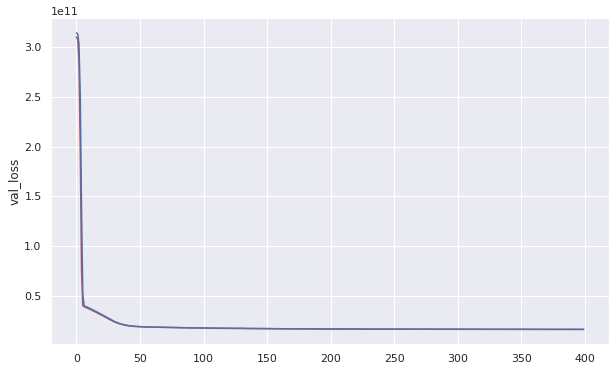

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=losses, x= losses.index, y="val_loss",color='r')
sns.lineplot(data=losses, x= losses.index, y="loss", color='b')
plt.show()

In [ ]:
#fazendo as previsões
predictions = model.predict(X_test)

In [ ]:
from sklearn import metrics

print('MAE: ' + str(metrics.mean_absolute_error(y_test, predictions)))
print('MSE: ' + str(metrics.mean_squared_error(y_test, predictions)))
print('RMSE: ' + str(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

MAE: 90317.32306200593
MSE: 16467072773.040203
RMSE: 128324.09272245101


In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test,predictions)

0.7323890844891001

In [ ]:
pred_df = pd.DataFrame({'Test Y': y_test ,'Model Predictions': predictions.reshape(predictions.size,)})

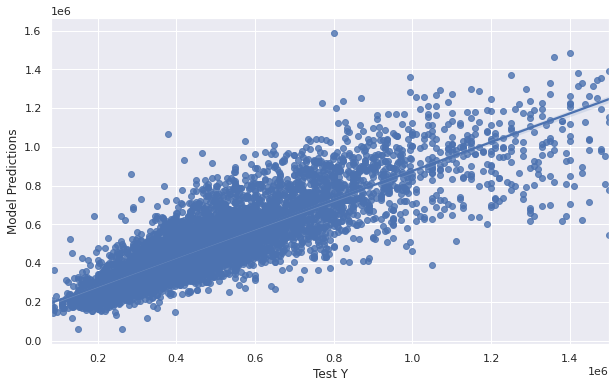

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x='Test Y', y='Model Predictions', data=pred_df, fit_reg=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


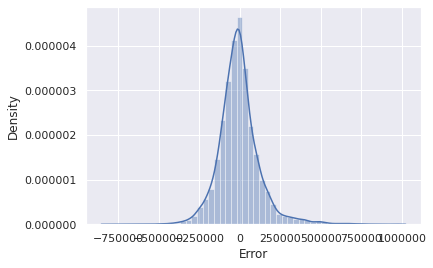

In [ ]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']
sns.distplot(pred_df['Error'],bins=50)
plt.ticklabel_format(style='plain')
plt.show()

**Predicting on a brand new house**


In [ ]:
single_house = df.drop('price',axis=1).iloc[0]
single_house = scaler.transform(single_house.values.reshape(-1, 19))
model.predict(single_house)

array([[284211.25]], dtype=float32)

In [ ]:
df.iloc[0]['price']

221900.0